<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

## Keras

In [2]:
##### Your Code Here #####
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np
import pandas as pd

In [3]:
# Get the data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [5]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [6]:
from tensorflow.keras.utils import normalize

In [12]:
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

In [14]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_mse', min_delta=0.10, patience=5)

In [13]:
model = Sequential()

In [15]:
model.add(Dense(10, input_dim=13, activation="softmax"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))

In [17]:
model.compile(loss='mse', 
              optimizer="adam",
              metrics=['mae', 'mse'])

In [29]:
model.fit(x=x_train_norm, 
        y=y_train, 
        epochs=20, 
        validation_data=(x_test_norm, y_test), 
        callbacks=[tensorboard_callback])#, stop])

Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 0s 306us/sample - loss: 84.1974 - mae: 6.5984 - mse: 84.1974 - val_loss: 83.4902 - val_mae: 6.5072 - val_mse: 83.4902
Epoch 2/20
404/404 [==============================] - 0s 118us/sample - loss: 84.2474 - mae: 6.6342 - mse: 84.2474 - val_loss: 83.0098 - val_mae: 6.5235 - val_mse: 83.0098
Epoch 3/20
404/404 [==============================] - 0s 153us/sample - loss: 83.9869 - mae: 6.6324 - mse: 83.9868 - val_loss: 83.1818 - val_mae: 6.5040 - val_mse: 83.1818
Epoch 4/20
404/404 [==============================] - 0s 126us/sample - loss: 83.9228 - mae: 6.5983 - mse: 83.9228 - val_loss: 83.0516 - val_mae: 6.5010 - val_mse: 83.0517
Epoch 5/20
404/404 [==============================] - 0s 99us/sample - loss: 83.8117 - mae: 6.6078 - mse: 83.8117 - val_loss: 82.8622 - val_mae: 6.5007 - val_mse: 82.8622
Epoch 6/20
404/404 [==============================] - 0s 99us/sample - loss: 83.7960 - mae: 6.5

In [32]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test_norm, y_test, batch_size=128)
print('Test loss', results[0])
print('Test MAE:', results[1])
print('Test MSE:', results[2])


# Evaluate on test data
102/102 [==============================] - 0s 29us/sample - loss: 79.3395 - mae: 6.3526 - mse: 79.3395
Test loss 79.3394775390625
Test MAE: 6.3526263
Test MSE: 79.33948


In [33]:
tf_mae = results[1]
tf_mse = results[2]

In [22]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 15212), started 3:15:23 ago. (Use '!kill 15212' to kill it.)

## Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_model = LinearRegression()
model.fit(x_train_norm, y_train)
y_pred_train = model.predict(x_train_norm)
y_pred_test = model.predict(x_test_norm)

Train on 404 samples
404/404 [==============================] - 0s 49us/sample - loss: 84.3051 - mae: 6.6246 - mse: 84.3051


In [28]:
#print('Train Mean Squared Error:', (mean_squared_error(y_train, y_pred_train)))
print('Test Mean Square Error:', mean_squared_error(y_test, y_pred_test))
#print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))

Test Mean Square Error: 83.55452583406036
Test Mean Absolute Error: 6.511185234668208


In [34]:
lin_mae = mean_absolute_error(y_test, y_pred_test)
lin_mse = mean_squared_error(y_test, y_pred_test)

## Comparison

In [39]:
# On comparison, the tensorflow model was better but not by a crazy margin. 
print("Keras Model")
print(f"MAE: {tf_mae:.2f}")
print(f"MSE: {tf_mse:.2f}")
print('-'*20)
print("Linear Regression Model")
print(f"MAE: {lin_mae:.2f}")
print(f"MSE: {lin_mse:.2f}")

Keras Model
MAE: 6.35
MSE: 79.34
--------------------
Linear Regression Model
MAE: 6.51
MSE: 83.55


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [40]:
##### Your Code Here #####
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

In [41]:
# Load the Data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [44]:
X_train[0].shape

(28, 28)

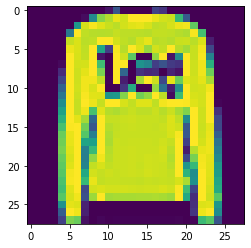

In [50]:
import matplotlib.pyplot as plt

plt.imshow(X_test[1])

In [51]:
# X Variable Types
num_classes = 10  # Because there are 10 different classes for outcomes

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') /255.

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
        y=y_train, 
        epochs=50, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback, stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4877 - accuracy: 0.8228 - val_loss: 0.4842 - val_accuracy: 0.8152
Epoch 2/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3671 - accuracy: 0.8644 - val_loss: 0.3564 - val_accuracy: 0.8717
Epoch 3/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3285 - accuracy: 0.8790 - val_loss: 0.3719 - val_accuracy: 0.8661
Epoch 4/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3089 - accuracy: 0.8852 - val_loss: 0.3666 - val_accuracy: 0.8705
Epoch 5/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2930 - accuracy: 0.8913 - val_loss: 0.3386 - val_accuracy: 0.8758


In [54]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 15212), started 4:19:36 ago. (Use '!kill 15212' to kill it.)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.